In [1]:
import pandas as pd
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df = pd.read_excel('./data/PredictionResult.xlsx')
df.head()

,ID,Data label,Prediction result,P0,P1
0,A0001,0,1,0.2147,0.7853
1,A0002,0,1,0.4736,0.5264
2,A0003,0,1,0.3018,0.6982
3,A0004,0,0,0.8745,0.1255
4,A0005,1,0,0.7436,0.2564


首先，自己完成二分类模型的混淆矩阵函数，输出TP、FP、TN、FN。

In [3]:
def confusion_matrix_binary1(y_true,y_pred):
    _TP = 0
    _FP = 0
    _TN = 0
    _FN = 0
    for i in range(len(y_true)):
        if y_true[i] == y_pred[i]:
            if y_true == 1:
                _TP += 1 # 被模型预测为正类的正样本
            else:
                _TN += 1 # 被模型预测为负类的负样本
        else:
            if y_true[i] == 1 and y_pred[i] == 0:
                _FN += 1 # 被模型预测为负类的正样本
            else:
                _FP += 1 # 被模型预测为正类的负样本
    return (_TP,_TN),(_FP,_FN)


def confusion_matrix_binary(data:pd.DataFrame):
    _TP = data[(data['Data label'] == 1) & (data['Prediction result'] == 1)]['ID'].count()
    # 被模型预测为正类的正样本
    _TN = data[(data['Data label'] == 0) & (data['Prediction result'] == 0)]['ID'].count()
    # 被模型预测为负类的负样本
    _FN = data[(data['Data label'] == 1) & (data['Prediction result'] == 0)]['ID'].count()
    # 被模型预测为负类的正样本
    _FP = data[(data['Data label'] == 0) & (data['Prediction result'] == 1)]['ID'].count()
    # 被模型预测为正类的负样本
    return (_TP,_TN),(_FP,_FN)

In [4]:
(TP,TN),(FP,FN) = confusion_matrix_binary(df)
cf_mx_self = np.array([[TN,FP],[FN,TP]])
cf_mx_self

array([[93, 61],
       [25, 71]], dtype=int64)

In [5]:
cf_mx_sklearn = confusion_matrix(df['Data label'].values.tolist(),df['Prediction result'].values.tolist())
cf_mx_sklearn

array([[93, 61],
       [25, 71]], dtype=int64)

比较sklearn的库，自行完成的confusion_matrix_binary函数和正确结果一致。

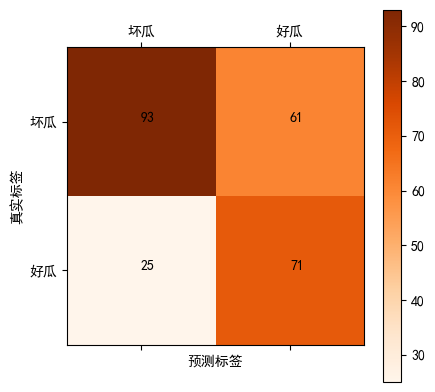

In [6]:
plt.matshow(cf_mx_sklearn,cmap=plt.cm.Oranges)
plt.xticks(range(2),['坏瓜','好瓜'])
plt.yticks(range(2),['坏瓜','好瓜'])
for i in range(len(cf_mx_sklearn)):
    for j in range(len(cf_mx_sklearn[i])):
        plt.text(j,i,str(cf_mx_sklearn[i][j]))
plt.colorbar()
plt.xlabel('预测标签')
plt.ylabel('真实标签')
# plt.title('图5 预测结果的混淆矩阵')
plt.show()

In [7]:
def binary_predict_loss(data:pd.DataFrame):
    _count = data['ID'].count()
    _false_label = data[data['Data label'] != data['Prediction result']]['ID'].count()
    return _false_label / _count


def binary_predict_accuracy(data:pd.DataFrame):
    _count = data['ID'].count()
    _true_label = data[data['Data label'] == data['Prediction result']]['ID'].count()
    return _true_label / _count


val_loss = binary_predict_loss(df)
val_acc = binary_predict_accuracy(df)
print(f"西瓜预测结果\n准确率=\t{val_acc}\n错误率=\t{val_loss}")

西瓜预测结果
准确率=	0.656
错误率=	0.344


In [8]:
def recall_precision_F1(data):
    (_TP,_TN),(_FP,_FN) = confusion_matrix_binary(data)
    _P = _TP / (_TP+_FP)
    _R = _TP / (_TP+_FN)
    _F1 = (2*_P*_R)/(_P+_R)
    return round(_R,2),round(_P,2),round(_F1,2)


R,P,F1 = recall_precision_F1(df)
print(f"西瓜预测结果\nPrecision=\t{P}\nRecall=\t\t{R}\nF1-score=\t{F1}")

西瓜预测结果
Precision=	0.54
Recall=		0.74
F1-score=	0.62


In [9]:
print(classification_report(df['Data label'].values.tolist(),df['Prediction result'].values.tolist()))

              precision    recall  f1-score   support

           0       0.79      0.60      0.68       154
           1       0.54      0.74      0.62        96

    accuracy                           0.66       250
   macro avg       0.66      0.67      0.65       250
weighted avg       0.69      0.66      0.66       250



In [10]:
y = df['Data label'].values.tolist()
scores = df['P1'].values.tolist()
fpr, tpr, thresholds = metrics.roc_curve(y, scores, pos_label=1)
auc = metrics.auc(fpr, tpr)

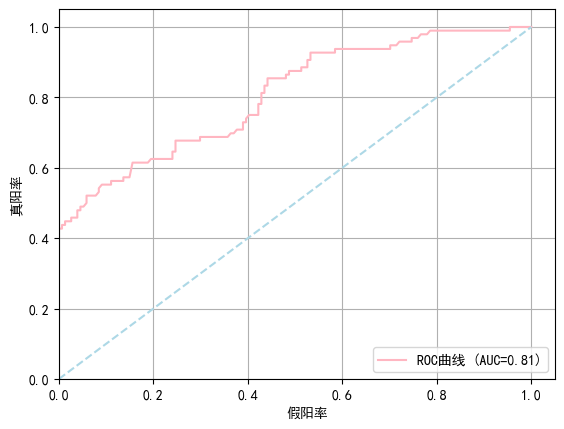

In [11]:
plt.figure()
plt.plot(fpr, tpr, color='lightpink', label=f'ROC曲线 (AUC={round(auc,2)})')
plt.plot([0, 1], [0, 1], color='lightblue' , linestyle='--')
plt.xlim([.0, 1.05])
plt.ylim([.0, 1.05])
plt.xlabel('假阳率')
plt.ylabel('真阳率')
# plt.title('ROC曲线')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()